### Sommaire

* [Chapitre 1. Premières explorations des sets de données](#chapter1)
    * [Section 1.1. Contexte et objectifs du projet](#section_1_1)
    * [Section 1.2. Importation des librairies](#section_1_2)
    * [Section 1.3. Importation des données](#section_1_3)
    * [Section 1.4. Exploration préliminaire des variables du jeu de données](#section_1_4)
        * [Section 1.4.1. Analyse des types et des colonnes, et forme des DataFrames ](#section_1_4_1)
        * [Section 1.4.2. Analyse des doublons dans chaque DataFrame](#section_1_4_2)
        * [Section 1.4.3. Résumé de la qualité des données](#section_1_4_3)
* [Chapitre 2. Exploration et Analyse de données avec DataViz](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
    * [Section 2.3](#section_2_3)
    * [Section 2.4](#section_2_4)
    * [Section 2.5](#section_2_5)
 
* [Chapitre 3. Nettoyage de données et Pre-procession](#chapter3)
    * [Section 3.1](#section_3_1)
    * [Section 3.2](#section_3_2)
    * 
* [Chapitre 4. ](#chapter4)
    * [Section 4.1](#section_4_1)
    * [Section 4.2](#section_4_2)


### Chapitre 1. Premières explorations des sets de données <a class="anchor" id="chapter1"></a>

#### Section 1.1. Contexte et objectifs du projet <a class="anchor" id="section_1_1"></a>

**Contexte :** L'INSEE, Institut national de la statistique et des études économiques, est l'organisme officiel français chargé de recueillir une variété de données sur le territoire français. Ces données, qu'elles soient démographiques (telles que les naissances, les décès, la densité de la population...) ou économiques (comme les salaires, le nombre d'entreprises par secteur d'activité ou par taille...), offrent une vision complète de la société française. 
Elles constituent ainsi une ressource précieuse pour analyser et comprendre les dynamiques sociales, économiques et territoriales du pays.

**Objectifs :** Cette étude vise à comparer les inégalités en France selon plusieurs dimensions. Tout d'abord, nous nous pencherons sur les disparités entre les entreprises, en examinant leur localisation géographique et leur taille. 
Ensuite, nous nous intéresserons aux inégalités au sein de la population, en analysant les variations de salaires en fonction de différents critères tels que la catégorie d’emploi et la localisation géographique. 
Enfin, nous concentrerons notre attention sur une grande ville en particulier, afin d'étudier de manière approfondie les inégalités qui peuvent exister à l'échelle locale.


#### Section 1.2. Importation des librairies <a class="anchor" id="section_1_2"></a>

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules from the appended path
from fi_functions import *

#### Section 1.3. Importation des données <a class="anchor" id="section_1_3"></a>

In [2]:
df_entreprises = pd.read_csv('../data/base_etablissement_par_tranche_effectif.csv') 
display(df_entreprises.head())

df_salary = pd.read_csv('../data/net_salary_per_town_categories_update2021.csv', sep = ';')
display(df_salary.head())

df_name_geographic = pd.read_csv('../data/name_geographic_information.csv', na_values = '-') 
display(df_name_geographic.head())

df_population = pd.read_csv('../data/population.csv', dtype={'CODGEO': object} )
display(df_population.head())

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


,CODGEO,SNHM20,SNHMC20,SNHMP20,SNHME20,SNHMO20,SNHMF20,SNHMFC20,SNHMFP20,SNHMFE20,...,SNHMHO20,SNHM1820,SNHM2620,SNHM5020,SNHMF1820,SNHMF2620,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020
0,1004,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.806580,14.368130,11.045518,...,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.130620,19.226540
1,1007,15.261333,24.391671,16.179052,11.917058,12.520221,13.855898,21.532587,15.160246,11.951341,...,12.881610,10.544073,15.263487,16.961952,10.618428,14.034526,14.418987,10.487221,16.229187,19.324302
2,1014,14.578709,27.940065,16.384056,12.175141,11.848787,12.570863,20.702968,13.198429,12.152977,...,12.304387,11.058325,14.116861,16.528222,10.295307,12.226430,13.932078,11.623660,15.517659,18.409024
3,1024,14.658174,23.817275,16.319296,11.905547,12.127913,13.053780,20.157674,14.923592,11.414435,...,12.525517,10.498073,14.627982,16.404495,10.031113,13.268833,13.691905,10.812016,15.505663,18.422798
4,1025,14.952910,25.822076,15.365464,11.663794,12.400297,13.444614,22.271103,14.233353,11.410936,...,12.666390,10.385396,14.750372,16.854860,10.309374,13.513608,14.336143,10.442608,15.580433,18.421533


,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,01001,L'Abergement-Clémenciat,11,0,1,15
1,COM,01001,L'Abergement-Clémenciat,11,0,2,15
2,COM,01001,L'Abergement-Clémenciat,11,5,1,20
3,COM,01001,L'Abergement-Clémenciat,11,5,2,20
4,COM,01001,L'Abergement-Clémenciat,11,10,1,20


#### Section 1.4. Exploration préliminaire des variables du jeu de données <a class="anchor" id="section_1_4"></a> 

##### Section 1.4.1. Analyse des types et des colonnes, et forme des DataFrames <a class="anchor" id="section_1_4_1"></a> 

In [3]:
# Review data types and columns info and shape

print(df_entreprises.info())
print(df_salary.info())
print(df_name_geographic.info())
print(df_population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36681 non-null  object
 1   LIBGEO    36681 non-null  object
 2   REG       36681 non-null  int64 
 3   DEP       36681 non-null  object
 4   E14TST    36681 non-null  int64 
 5   E14TS0ND  36681 non-null  int64 
 6   E14TS1    36681 non-null  int64 
 7   E14TS6    36681 non-null  int64 
 8   E14TS10   36681 non-null  int64 
 9   E14TS20   36681 non-null  int64 
 10  E14TS50   36681 non-null  int64 
 11  E14TS100  36681 non-null  int64 
 12  E14TS200  36681 non-null  int64 
 13  E14TS500  36681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5421 non-null   object 


In [4]:
# Shape for each DataFrame 

print("Shape of DF:")
print("entreprise:",df_entreprises.shape)
print("salary:",df_salary.shape)
print("name_geographic:",df_name_geographic.shape)
print("population:",df_population.shape)

Shape of DF:
entreprise: (36681, 14)
salary: (5421, 25)
name_geographic: (36840, 14)
population: (8536584, 7)


##### Section 1.4.2. Analyse des doublons dans chaque DataFrame<a class="anchor" id="section_1_4_2"></a> 

In [5]:
# Number of duplicates for each DataFrame

print('Number of duplicates :')
print('entreprises :', df_entreprises.duplicated().sum())
print('salary :', df_salary.duplicated().sum())
print('name_geographic :', df_name_geographic.duplicated().sum(), ', name_geographic by code_insee :', df_name_geographic.duplicated(subset=['code_insee']).sum())
print('population :', df_population.duplicated().sum())

Number of duplicates :
entreprises : 0
salary : 0
name_geographic : 0 , name_geographic by code_insee : 147
population : 0


##### Section 1.4.3. Résumé de la qualité des données<a class="anchor" id="section_1_4_3"></a>  

In [6]:
summary(df_entreprises)
summary(df_salary)
summary(df_population)
summary_short(df_name_geographic)

,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,36681,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,34142,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
REG,int64,0.0,27,0,0.0,Too many values...,49.415365,Nothing to report
DEP,object,0.0,101,0,0.0,Too many values...,62,Nothing to report
E14TST,int64,0.0,1423,399,1.0,Too many values...,123.456067,Nothing to report
E14TS0ND,int64,0.0,1125,579,2.0,Too many values...,83.555301,Nothing to report
E14TS1,int64,0.0,650,6118,17.0,Too many values...,27.291486,Nothing to report
E14TS6,int64,0.0,272,20324,55.0,Too many values...,5.22055,Nothing to report
E14TS10,int64,0.0,220,22641,62.0,Too many values...,3.800333,Nothing to report
E14TS20,int64,0.0,160,25884,71.0,Too many values...,2.296448,Nothing to report


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,5421,0,0.0,Too many values...,10003,Nothing to report
SNHM20,float64,0.0,5421,0,0.0,Too many values...,15.440462,Nothing to report
SNHMC20,float64,0.0,5421,0,0.0,Too many values...,25.194776,Nothing to report
SNHMP20,float64,0.0,5421,0,0.0,Too many values...,15.847373,Nothing to report
SNHME20,float64,0.0,5421,0,0.0,Too many values...,11.573974,Nothing to report
SNHMO20,float64,0.0,5421,0,0.0,Too many values...,12.124348,Nothing to report
SNHMF20,float64,0.0,5421,0,0.0,Too many values...,13.824962,Nothing to report
SNHMFC20,float64,0.0,5421,0,0.0,Too many values...,22.03816,Nothing to report
SNHMFP20,float64,0.0,5421,0,0.0,Too many values...,14.682978,Nothing to report
SNHMFE20,float64,0.0,5421,0,0.0,Too many values...,11.402604,Nothing to report


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
NIVGEO,object,0.0,1,0,0.0,[COM],COM,It's imbalanced!
CODGEO,object,0.0,35868,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,33452,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
MOCO,int64,0.0,7,0,0.0,"[11, 12, 21, 22, 23, 31, 32]",11,Nothing to report
AGEQ80_17,int64,0.0,17,502152,6.0,Too many values...,0,Nothing to report
SEXE,int64,0.0,2,0,0.0,"[1, 2]",1,Nothing to report
NB,int64,0.0,2953,6325631,74.0,Too many values...,7.446743,Nothing to report


,nb_unique_values,%_missing_values,nb_missing_values,type
EU_circo,8,0.0,0,object
code_région,28,0.0,0,int64
nom_région,28,0.0,0,object
chef.lieu_région,28,0.0,0,object
numéro_département,102,0.0,0,object
nom_département,102,0.0,0,object
préfecture,102,0.0,0,object
numéro_circonscription,24,0.0,0,int64
nom_commune,34142,0.0,0,object
codes_postaux,6106,0.0,0,object


**Conclusion pour df_name_geographic :** 
- Les noms des colonnes en français, tandis que ceux des autres DataFrames sont en anglais. Il est donc nécessaire de les renommer pour une cohérence.
- La colonne "code_insee" semble correspondre à "CODGEO", mais il y a un '0' au debut, par example, '1024' au lieu de '01024'.
- Les colonnes "latitude", "longitude", "éloignement" présentent respectivement 2929, 2841 et 2962 valeurs manquantes (NaN).
- La colonne "longitude" devrait normalement être de type float64. Cependant, nous n'avons pas pu modifier le type en raison de problèmes avec les données. Par exemple :
  
    - L'utilisation de ',' au lieu de '.' pour la notation décimale : **'5,83'**
    - La présence de '-' : ceux-ci doivent être remplacés par des valeurs NaN.

**Conclusion pour df_salary :** 
-  Il y a de nombreuses catégories de salariés, mais on peut voir qu'elles sont divisées selon les catégories suivantes : catégorie d'emploi, sexe et âge. Ça peut faciliter analyse. 
- La colonne "CODGEO" semble correspondre à "CODGEO", mais il y a un '0' au debut, par example, '1024' au lieu de '01024'.

**Conclusion pour df_entreprises :**  
- Il y a beaucoup de zeros dans la DF pour les colonnes suivantes :
    - 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'
- Pour améliorer cela, nous pouvons créer de nouvelles colonnes qui catégorisent les données en fonction de tailles d'entreprises plus vastes :
    - Micro entreprise: 0 <= taille < 10 personnes
    - Petit entreprise: 10 <= taille < 50 personnes
    - Moyenne entreprise :  50 <= taille < 200 personnes
    - Grande Entreprise : taille >= 200 personnes

### Chapitre 2. Exploration et Analyse de données avec DataViz <a class="anchor" id="chapter2"></a>

#### Section 2.1 <a class="anchor" id="section_2_1"></a>

#### Section 2.2 <a class="anchor" id="section_2_2"></a>

#### Section 2.3 <a class="anchor" id="section_2_3"></a>
#### Section 2.4 <a class="anchor" id="section_2_4"></a>
#### Section 2.5 <a class="anchor" id="section_2_5"></a>





In [28]:
summary(df_merge_ent_geo)

,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,36300,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,33765,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
REG,int64,0.0,26,0,0.0,Too many values...,48.982507,Nothing to report
DEP,object,0.0,99,0,0.0,Too many values...,62,Nothing to report
E14TST,int64,0.0,1418,382,1.0,Too many values...,123.76449,Nothing to report
E14TS0ND,int64,0.0,1122,560,2.0,Too many values...,83.737218,Nothing to report
E14TS1,int64,0.0,648,6007,17.0,Too many values...,27.359945,Nothing to report
E14TS6,int64,0.0,271,20080,55.0,Too many values...,5.239807,Nothing to report
E14TS10,int64,0.0,219,22365,62.0,Too many values...,3.816777,Nothing to report
E14TS20,int64,0.0,160,25574,70.0,Too many values...,2.309063,Nothing to report


In [63]:
# Aggregate the data by regional capital and sum the number of enterprises
region_enterprises = df_merge_ent_geo.groupby('chef.lieu_région')['E14TST'].sum().reset_index()

# Sort region_enterprises DataFrame by the 'E14TST' column
region_enterprises_sorted = region_enterprises.sort_values(by = 'E14TST', ascending = False)
display(region_enterprises_sorted)

# Aggregate the data by EU_circo and sum the number of enterprises
eu_circo_enterprises = df_merge_ent_geo.groupby('EU_circo')['E14TST'].sum().reset_index()

# Sort eu_circo_enterprises DataFrame by the 'E14TST' column
eu_circo_enterprises_sorted = eu_circo_enterprises.sort_values(by='E14TST', ascending=False)
display(eu_circo_enterprises_sorted)

,chef.lieu_région,E14TST
19,Paris,1048252
12,Lyon,464813
14,Marseille,462972
3,Bordeaux,242590
16,Montpellier,218718
25,Toulouse,209984
17,Nantes,205248
10,Lille,191914
21,Rennes,187280
18,Orléans,137990


,EU_circo,E14TST
7,Île-de-France,1048252
5,Sud-Est,927785
6,Sud-Ouest,671292
3,Ouest,502543
1,Est,460762
2,Nord-Ouest,454325
0,Centre,265317
4,Outre-Mer,162375


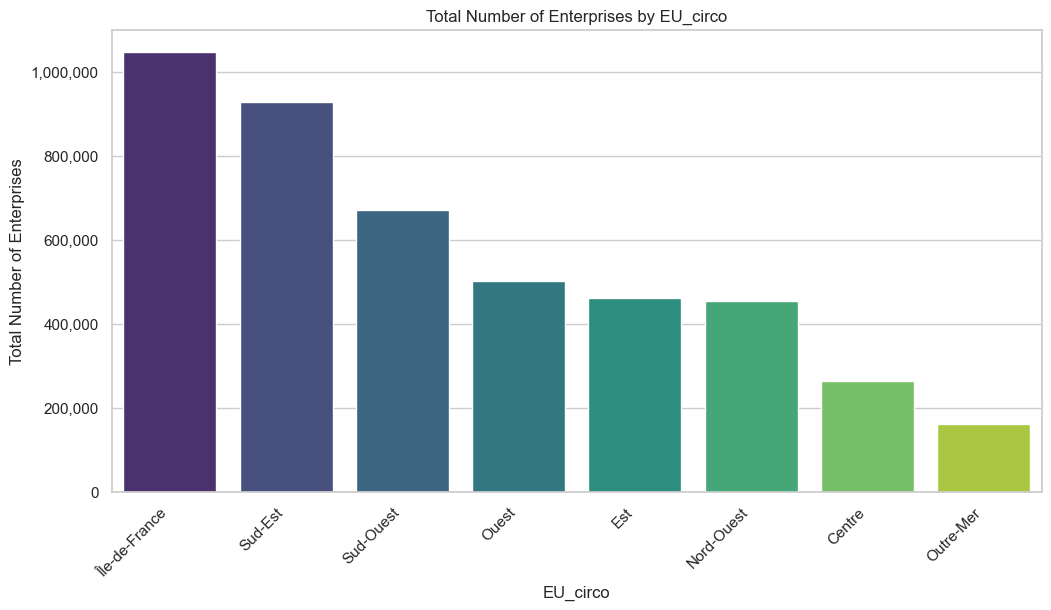

In [64]:
from matplotlib.ticker import FuncFormatter
#df_merge_ent_geo

sns.set(style="whitegrid")

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='EU_circo', y='E14TST', data=eu_circo_enterprises_sorted, palette='viridis' )
plt.title('Total Number of Enterprises by EU_circo')
plt.xlabel('EU_circo')
plt.ylabel('Total Number of Enterprises')
plt.xticks(rotation=45, ha='right')

# Customize the y-axis ticks to show whole numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show();


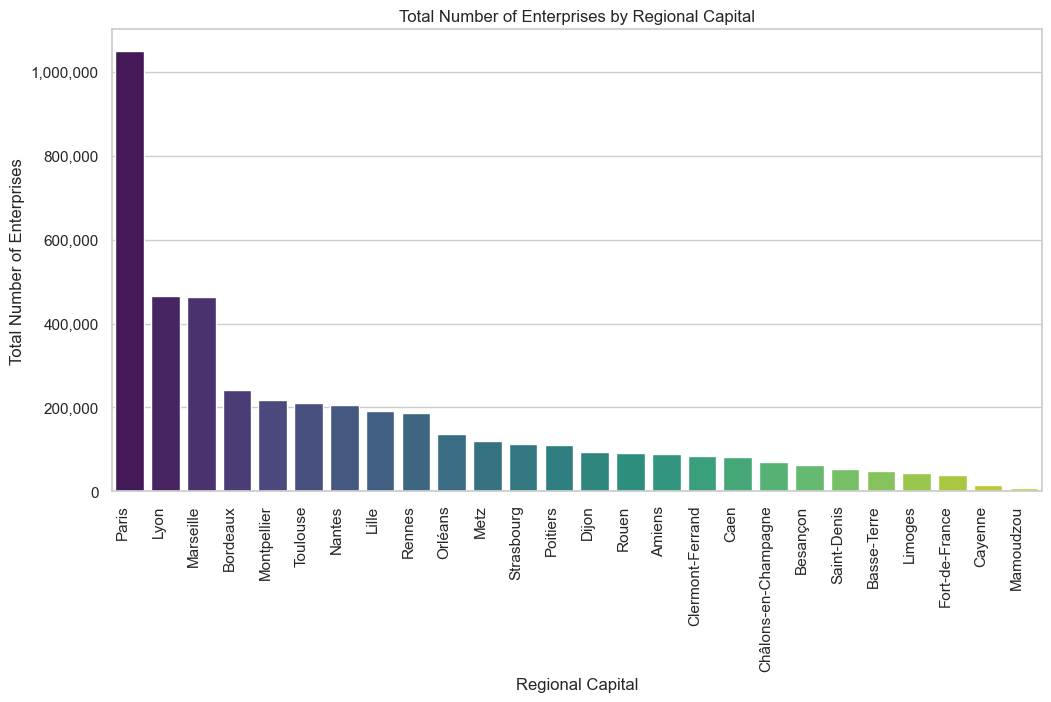

In [65]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='chef.lieu_région', y='E14TST', data=region_enterprises_sorted, palette='viridis' )
plt.title('Total Number of Enterprises by Regional Capital')
plt.xlabel('Regional Capital')
plt.ylabel('Total Number of Enterprises')
plt.xticks(rotation = 90, ha='right')

# Customize the y-axis ticks to show whole numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show();

In [70]:
df_merge_ent_geo.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'E14TST', 'E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500', 'nb_micro_entreprises', 'nb_small_entreprises',
       'nb_medium_entreprises', 'nb_large_entreprises', 'EU_circo',
       'code_région', 'nom_région', 'chef.lieu_région', 'numéro_département',
       'nom_département', 'préfecture', 'numéro_circonscription',
       'nom_commune', 'codes_postaux', 'code_insee', 'latitude', 'longitude',
       'éloignement'],
      dtype='object')

In [73]:
# Aggregate the data by region and sum the counts of each type of enterprise
region_enterprise_counts = df_merge_ent_geo.groupby('chef.lieu_région')[['nb_micro_entreprises', 'nb_small_entreprises', 'nb_medium_entreprises', 'nb_large_entreprises']].sum().reset_index()
region_enterprise_counts

,chef.lieu_région,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises
0,Amiens,26085,5122,1008,215
1,Basse-Terre,7759,1151,135,14
2,Besançon,18876,3723,625,104
3,Bordeaux,64792,11456,1797,276
4,Caen,25151,4637,784,149
5,Cayenne,2959,507,62,0
6,Châlons-en-Champagne,20887,4364,785,137
7,Clermont-Ferrand,23744,4370,700,124
8,Dijon,28406,5290,925,179
9,Fort-de-France,6983,1088,149,20


<Axes: xlabel='chef.lieu_région'>

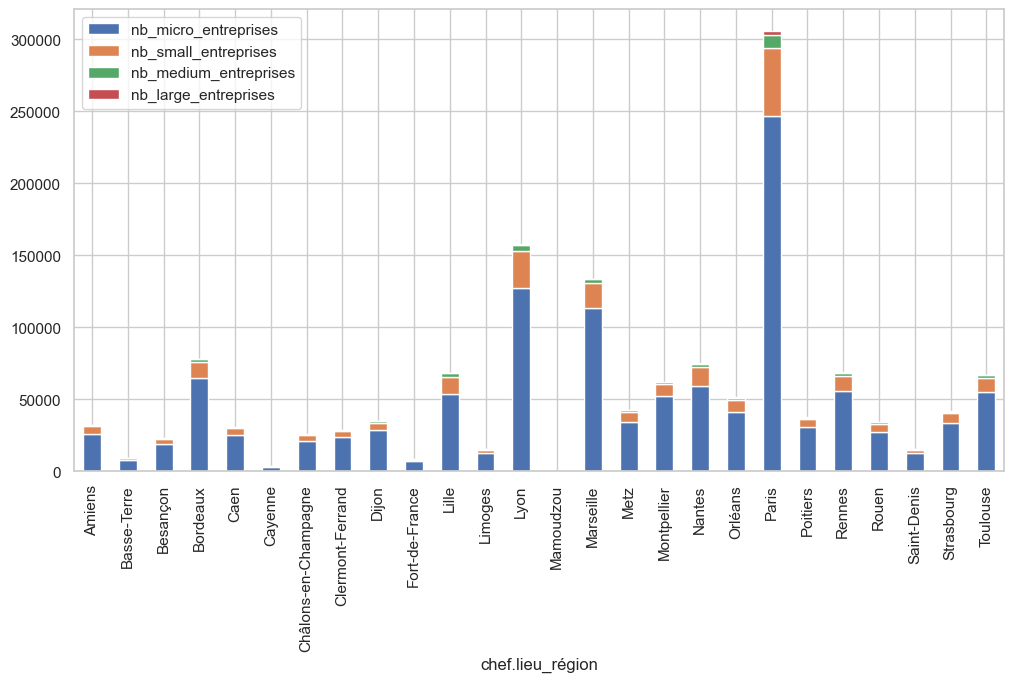

In [74]:
region_enterprise_counts.plot(x='chef.lieu_région', kind='bar', stacked=True, figsize=(12, 6))

### Chapitre 3. Nettoyage de données et Pre-procession  <a class="anchor" id="chapter3"></a>

#### Section 3.1. df_name_geographic dataset preprocessing <a class="anchor" id="section_3_1"></a>


In [7]:
# Detection errors in the longitude, latitude columns

print(df_name_geographic.longitude.apply(detection_error).loc[df_name_geographic.longitude.apply(detection_error).notna()].values)
print(df_name_geographic.latitude.apply(detection_error).loc[df_name_geographic.latitude.apply(detection_error).notna()].values)

['5,83' '6,01' '6,24' '5,82' '6,31' '4,77' '0,94' '2,07' '0,97' '1,54'
 '1,67' '1,5' '1,78' '1,69' '1,8' '1,63' '1,8' '1,88' '1,67' '0,89' '1,21'
 '1,23' '0,98' '1,15' '1,31' '1,09' '1,18' '1,5' '1,38' '1,11' '1,71'
 '1,93' '1,17' '1,12' '1,68' '1,64' '1,28' '1,02' '1,17' '1,5' '2,25'
 '2,03' '2,15' '2,43' '3,09' '2,89' '4,76' '0,08' '2,51' '4,33' '-2,24'
 '-3,43' '1,91' '1,3' '-5,1' '1,29' '1,2' '5,28' '5,28' '5,96' '1,74'
 '4,07' '3,89' '3,89' '3,48' '3,47' '3,93' '2,93' '3,93' '3,84' '1,76'
 '3,01' '2,03' '4,9' '4,32' '5,84' '2,55' '-0,75' '1,95' '1,97' '6,74'
 '5,04' '-1,94' '0,25' '0,41' '3,28']
[]


In [8]:
# Replacing commas to dots
df_name_geographic["longitude"] = df_name_geographic["longitude"].apply(lambda x: str(x).replace(',','.'))
df_name_geographic["longitude"] = df_name_geographic["longitude"].astype(float)

#df_name_geographic.dtypes

In [9]:
# Verification of duplicates by code_insee in df_name_geographic 
df_name_geographic[df_name_geographic.duplicated(subset = ['code_insee'])]

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
2293,Sud-Est,93,Provence-Alpes-Côte d'Azur,Marseille,06,Alpes-Maritimes,Nice,2,Nice,06000,6088,43.700000,7.250000,1.08
2296,Sud-Est,93,Provence-Alpes-Côte d'Azur,Marseille,06,Alpes-Maritimes,Nice,3,Nice,06000,6088,43.700000,7.250000,1.08
2361,Sud-Est,93,Provence-Alpes-Côte d'Azur,Marseille,06,Alpes-Maritimes,Nice,5,Nice,06000,6088,43.700000,7.250000,1.08
2994,Est,21,Champagne-Ardenne,Châlons-en-Champagne,08,Ardennes,Charleville-Mézières,2,Charleville-Mézières,08000,8105,49.766667,4.716667,1.00
3909,Est,21,Champagne-Ardenne,Châlons-en-Champagne,10,Aube,Troyes,2,Troyes,10000,10387,48.300000,4.083333,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36503,Île-de-France,11,Île-de-France,Paris,94,Val-de-Marne,Créteil,7,Saint-Maur-des-Fossés,94100,94068,48.800000,2.500000,0.64
36512,Île-de-France,11,Île-de-France,Paris,94,Val-de-Marne,Créteil,10,Vitry-sur-Seine,94400,94081,48.783333,2.400000,0.90
36515,Île-de-France,11,Île-de-France,Paris,94,Val-de-Marne,Créteil,11,Gentilly,94250,94037,48.816667,2.333333,1.92
36679,Île-de-France,11,Île-de-France,Paris,95,Val-d'Oise,Cergy,8,Sarcelles,95200,95585,49.000000,2.383333,1.51


In [10]:
# Drop duplicates by code_insee in name_geographic
df_name_geographic.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)

In [11]:
# Verify the unique lengths of strings in the 'code_insee' column of df

unique_lengths_df_name_geographic = get_unique_lengths(df_name_geographic['code_insee'])

print("Unique lengths in 'code_insee' column, df_name_geographic:", unique_lengths_df_name_geographic)

Unique lengths in 'code_insee' column, df_name_geographic: [4 5]


In [12]:
# Adding leading zeros for the code_insee column

add_leading_zeros(df_name_geographic,'code_insee', 5)


In [23]:
# Verification of unique lengths in 'code_insee' column
print("Unique lengths in 'code_insee' column, df_name_geographic:", get_unique_lengths(df_name_geographic['code_insee']))

Unique lengths in 'code_insee' column, df_name_geographic: [5]


In [14]:
print(df_entreprises.shape, df_name_geographic.shape)

(36681, 14) (36693, 14)


#### Section 3.2. df_entreprises dataset preprocessing <a class="anchor" id="section_3_2"></a>

In [15]:
# Create a new column for the enterprise types

df_entreprises['nb_micro_entreprises'] = df_entreprises['E14TS1'] + df_entreprises['E14TS6']
df_entreprises['nb_small_entreprises'] = df_entreprises['E14TS10'] + df_entreprises['E14TS20']
df_entreprises['nb_medium_entreprises'] = df_entreprises['E14TS50'] + df_entreprises['E14TS100']
df_entreprises['nb_large_entreprises'] = df_entreprises['E14TS200'] + df_entreprises['E14TS500']

In [16]:
df_entreprises.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'E14TST', 'E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500', 'nb_micro_entreprises', 'nb_small_entreprises',
       'nb_medium_entreprises', 'nb_large_entreprises'],
      dtype='object')

In [17]:
# Drop unuseful columns in df_entreprises

#df_entreprises = df_entreprises.drop()

In [18]:
# Verify the unique lengths of strings in the 'CODGEO' column of df

unique_lengths_df_entreprises = get_unique_lengths(df_entreprises['CODGEO'])

print("Unique lengths in 'CODGEO' column, df_entreprises:", unique_lengths_df_entreprises)

Unique lengths in 'CODGEO' column, df_entreprises: [5]


In [19]:
# Merge df_entreprises and df_name_geographic

df_merge_ent_geo = pd.merge(left = df_entreprises, right = df_name_geographic, left_on = 'CODGEO', right_on = 'code_insee')


#### Section 3.3. df_salary dataset preprocessing <a class="anchor" id="section_3_3"></a>

In [20]:
# Verify the unique lengths of strings in the 'CODGEO' column of df

unique_lengths_df_salary = get_unique_lengths(df_salary['CODGEO'])
print("Unique lengths in 'CODGEO' column, df_salary:", unique_lengths_df_salary)

Unique lengths in 'CODGEO' column, df_salary: [4 5]


In [24]:
# Adding leading zeros for the CODGEO column

add_leading_zeros(df_salary, 'CODGEO', 5)

In [25]:
print("Unique lengths in 'CODGEO' column, df_salary:", get_unique_lengths(df_salary['CODGEO']))

Unique lengths in 'CODGEO' column, df_salary: [5]


#### Section 3.4. df_population dataset preprocessing <a class="anchor" id="section_3_4"></a>

In [26]:
# Verify the unique lengths of strings in the 'CODGEO' column of df

unique_lengths_df_population = get_unique_lengths(df_population['CODGEO'])

print("Unique lengths in 'CODGEO' column, df_population:", unique_lengths_df_population)

Unique lengths in 'CODGEO' column, df_population: [5]


### Chapitre 4. <a class="anchor" id="chapter4"></a>

#### Section 4.1.  <a class="anchor" id="section_4_1"></a>

In [ ]:
summary(df_entreprises)
summary(df_salary)
summary(df_population)
